In [1]:
print('Hello Word')

Hello Word


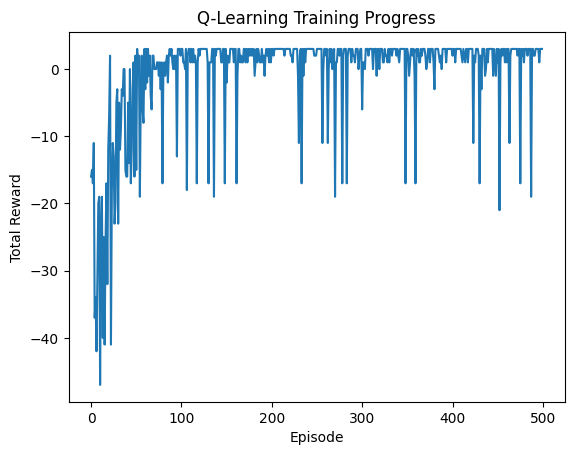

Optimal Path: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (2, 4), (3, 4), (4, 4)]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the environment
grid_size = 5
goal_state = (4, 4)
obstacle_states = [(1, 1), (2, 2), (3, 3)]

# Initialize parameters
epsilon = 0.1  # Exploration rate
alpha = 0.1    # Learning rate
gamma = 0.9    # Discount factor

actions = ['up', 'down', 'left', 'right']
q_table = np.zeros((grid_size, grid_size, len(actions)))

# Helper functions
def get_next_state(state, action):
    x, y = state
    if action == 'up':
        return (max(0, x - 1), y)
    elif action == 'down':
        return (min(grid_size - 1, x + 1), y)
    elif action == 'left':
        return (x, max(0, y - 1))
    elif action == 'right':
        return (x, min(grid_size - 1, y + 1))

def get_reward(state):
    if state == goal_state:
        return 10
    elif state in obstacle_states:
        return -10
    else:
        return -1

def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.choice(actions)
    else:
        x, y = state
        return actions[np.argmax(q_table[x, y])]

def is_terminal(state):
    return state == goal_state or state in obstacle_states

# Q-Learning algorithm
def train_q_learning(episodes=500):
    rewards = []
    for episode in range(episodes):
        state = (0, 0)
        total_reward = 0
        while not is_terminal(state):
            action = choose_action(state)
            next_state = get_next_state(state, action)
            reward = get_reward(next_state)

            # Update Q-value
            x, y = state
            next_x, next_y = next_state
            action_index = actions.index(action)
            max_next_q = np.max(q_table[next_x, next_y])
            q_table[x, y, action_index] += alpha * (reward + gamma * max_next_q - q_table[x, y, action_index])

            state = next_state
            total_reward += reward

        rewards.append(total_reward)

    return rewards

# Train the agent
rewards = train_q_learning()

# Plot rewards
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Q-Learning Training Progress')
plt.show()

# Test the trained agent
def test_agent():
    state = (0, 0)
    path = [state]
    while not is_terminal(state):
        x, y = state
        action = actions[np.argmax(q_table[x, y])]
        state = get_next_state(state, action)
        path.append(state)
    return path

# Display the optimal path
optimal_path = test_agent()
print("Optimal Path:", optimal_path)
